## Mở đầu về dự báo chuỗi thời gian: Lý thuyết và các phương pháp

### 1. Mở đầu

Phân tích và dự báo dữ liệu chuỗi thời gian ngày càng trở nên quan trọng do sản xuất dữ liệu chuỗi thời gian lớn và khi việc theo dõi và thu thập liên tục các dữ liệu đó trở nên phổ biến hơn, nhu cầu phân tích và dự báo hiệu quả hơn sẽ chỉ tăng lên

Dự báo là một phương pháp hữu hiệu hỗ trợ quá trình ra quyết định, lựa chọn chính sách - chiến lược trong quản lý...Hiện nay dự báo đang trở thành một trong những khâu quan trọng ở các bộ phận hoạch định chiến lược ở tầm vĩ mô cũng như ở các đơn vị kinh doanh

 ít chuyên gia thực hành hơn các lĩnh vực khác của khoa học dữ liệu

#### 1.1 Dữ liệu chuỗi thời gian là gì?

Dữ liệu chuỗi thời gian (time series) được hiểu là một chuỗi các giá trị được thu thập theo từng khoảng khắc thời gian liền nhau theo một tần suất thời gian thống nhất:
```
X(t_0), x(t_1), ...,x(t_k),..., x(t_k+n),...
```

**Một số ví dụ về chuỗi thời gian:**

- Dữ liệu sử dụng điện của một nhà máy
- 

https://www.kaggle.com/shenba/time-series-datasets?select=Electric_Production.csv

https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

**Electric_Production**

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/khoahocdulieu/TimeSeriesForecasting/main/datasets/Electric_Production.csv'
df = pd.read_csv(url, parse_dates=[0])
df=df.rename(columns={'IPG2211A2N':'Usage','DATE':'Date'})
df = df.set_index('Date')
df.head()

,Usage
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


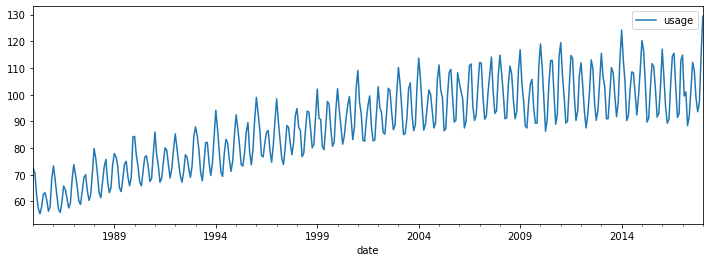

In [7]:
%matplotlib inline
df.plot(figsize=(12,4))

**daily-minimum-temperatures**

In [18]:
url1 = 'https://raw.githubusercontent.com/khoahocdulieu/TimeSeriesForecasting/main/datasets/daily-minimum-temperatures-in-me.csv'
df1 = pd.read_csv(url1, parse_dates=[0])
df1= df1.rename(columns={'Daily minimum temperatures':'Temperature'})
df1 = df1.set_index('Date')
df1.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [21]:
%matplotlib inline
df1.plot(figsize=(12,4))

TypeError: no numeric data to plot

#### 1.2 Phân biệt phân tích chuỗi thời gian (time series analysis) và dự báo chuỗi thời gian (time series forecasting)

- time series forecasting is a form of predictive modeling

- time series analysis is a form of descriptive modeling

#### 1.3 Phân loại dự báo chuỗi thời gian

##### 1.3.1 Dự báo đơn bước và đa bước  (One-Step và Multi-step Time Series Forecasting)

Dự báo chuỗi thời gian là phương pháp dự báo giá trị bước thời gian tiếp theo của chuỗi thời gian. Ví dụ chúng ta có giá trị về... của 8 tháng:

- 1 bước tức là dự báo giá trị tháng 9

- Còn nhiều bước ví dụ như là dự báo giá trị 3 tháng tiếp theo (tháng 9, 10 và 11)

```
Time,	Temperature
1,		56
2,		50
3,		59
4,		63
5,		52
6,		60
7,		55
```

**Có 4 kỹ thuật được sử dụng phổ biến trong dự báo đa bước đó là:**

NGuồn: https://machinelearningmastery.com/multi-step-time-series-forecasting/#:~:text=some%20rights%20reserved.-,Multi%2DStep%20Forecasting,time%20steps%20must%20be%20predicted.

**Kỹ thuật 1: Direct Multi-step Forecast Strategy**

Xây dựng các mô hình đự báo riêng biệt cho từng bước

```
prediction(t+1) = model1(obs(t-1), obs(t-2), ..., obs(t-n))
prediction(t+2) = model2(obs(t-2), obs(t-3), ..., obs(t-n))
```

**Nhược điểm:**

**Kỹ thuật 2: Recursive Multi-step Forecast Strategy.**

```
prediction(t+1) = model(obs(t-1), obs(t-2), ..., obs(t-n))
prediction(t+2) = model(prediction(t+1), obs(t-1), ..., obs(t-n))
```
**Kỹ thuật 3: Direct-Recursive Hybrid Multi-step Forecast Strategies.**

```
prediction(t+1) = model1(obs(t-1), obs(t-2), ..., obs(t-n))
prediction(t+2) = model2(prediction(t+1), obs(t-1), ..., obs(t-n))
```
**Kỹ thuật 4: Multiple Output Forecast Strategy.**

```
prediction(t+1), prediction(t+2) = model(obs(t-1), obs(t-2), ..., obs(t-n))
```

##### 1.3.2  Phân biệt dự báo chuỗi thời gian đơn biến (Univariate) và đa biến (Multivariate)

#### 1.4 Review các phương pháp dự báo chuỗi thời gian